In [1]:
import numpy as np
import pandas as pd
import wquantiles
import matplotlib.pyplot as plt
import seaborn as sns

## 位置估計

### 美國各州人口與謀殺率的位置估計

In [2]:
# 載入資料集
state = pd.read_csv('../../data/state.csv')
print(state)

             State  Population  Murder.Rate Abbreviation
0          Alabama     4779736          5.7           AL
1           Alaska      710231          5.6           AK
2          Arizona     6392017          4.7           AZ
3         Arkansas     2915918          5.6           AR
4       California    37253956          4.4           CA
5         Colorado     5029196          2.8           CO
6      Connecticut     3574097          2.4           CT
7         Delaware      897934          5.8           DE
8          Florida    18801310          5.8           FL
9          Georgia     9687653          5.7           GA
10          Hawaii     1360301          1.8           HI
11           Idaho     1567582          2.0           ID
12        Illinois    12830632          5.3           IL
13         Indiana     6483802          5.0           IN
14            Iowa     3046355          1.9           IA
15          Kansas     2853118          3.1           KS
16        Kentucky     4339367 

In [8]:
# 人口平均數
print(state['Population'].mean())

# 人口截尾平均數 scipy.stats 截去上下10%
from scipy.stats import trim_mean
print(trim_mean(state['Population'], 0.1))

# 人口中位數
print(state['Population'].median())

6162876.3
4783697.125
4436369.5


In [10]:
# 謀殺率加權平均數 以人口數當權重
print(np.average(state['Murder.Rate'], weights=state['Population']))

# 謀殺率加權中位數
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.445833981123393
4.4


## 變異數估計

### 美國各州人口的變異數估計

In [11]:
# 人口變異數
print(state['Population'].std())

# 人口四分位距
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

# 中位數絕對偏差 要用到statsmodels 的 robust.scale.mad()
from statsmodels import robust
print(robust.scale.mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


## 探索資料的分布

In [ ]:
# 謀殺率百分位數
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


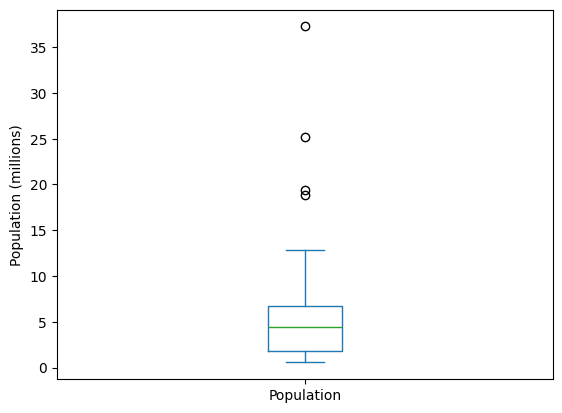

In [7]:
# 人口箱型圖
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)');

In [10]:
# 次數表
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts(sort=False)

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
(33584923.0, 37253956.0]     1
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

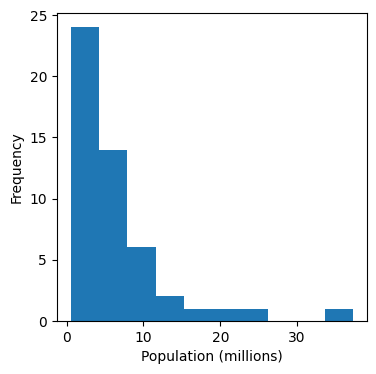

In [ ]:
# 直方圖
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

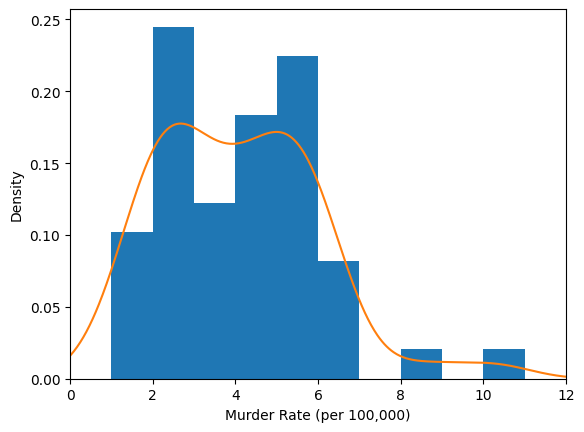

In [17]:
# 密度圖
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)');

## 探索二元資料及類別資料

In [18]:
# 載入資料集
dfw = pd.read_csv('../../data/dfw_airline.csv')
print(dfw)

    Carrier      ATC   Weather  Security    Inbound
0  64263.16  84856.5  11235.42    343.15  118427.82


In [19]:
# 計算百分比
print((dfw.div(dfw.sum(axis=1), axis=0) * 100).round(2))

   Carrier   ATC  Weather  Security  Inbound
0    23.02  30.4     4.03      0.12    42.43


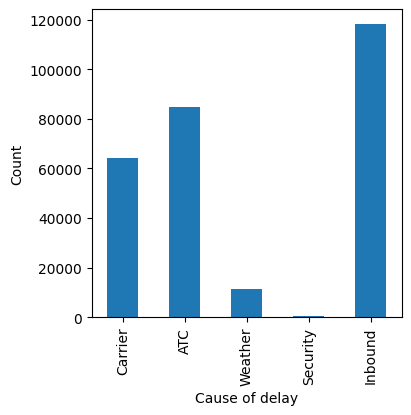

In [20]:
# 飛機誤點原因的長條圖
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count');

## 相關性

In [7]:
# 載入資料集
sp500_px = pd.read_csv('../../data/sp500_data.csv',index_col=0)
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [9]:
sp500_sym = pd.read_csv('../../data/sp500_sectors.csv')
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [ ]:
# 電信股票的相關性
telecom = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector']== 'telecommunications_services']['symbol']]
print(telecom.corr().round(3))

          T    CTL    FTR     VZ   LVLT
T     1.000  0.475  0.328  0.678  0.279
CTL   0.475  1.000  0.420  0.417  0.287
FTR   0.328  0.420  1.000  0.287  0.260
VZ    0.678  0.417  0.287  1.000  0.242
LVLT  0.279  0.287  0.260  0.242  1.000


<Axes: >

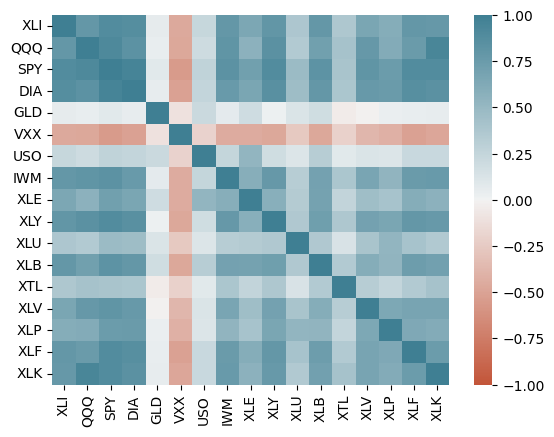

In [13]:
# 相關矩陣
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector']== 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

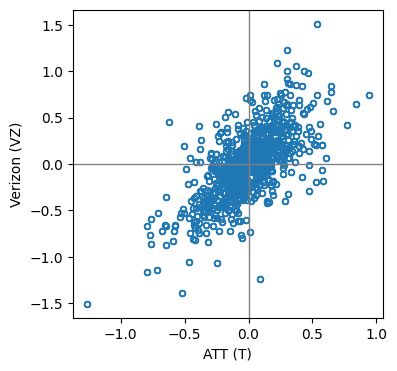

In [22]:
# 散佈圖
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1);

## 探索二個或多個變數

In [21]:
# 載入資料集
kc_tax = pd.read_csv('../../data/kc_tax.csv')

# 過濾需要的資料
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

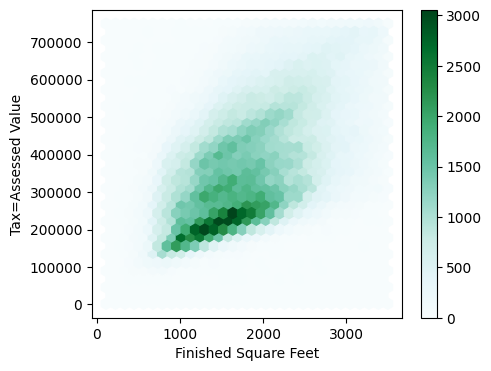

In [29]:
# 六角形圖
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax=Assessed Value');

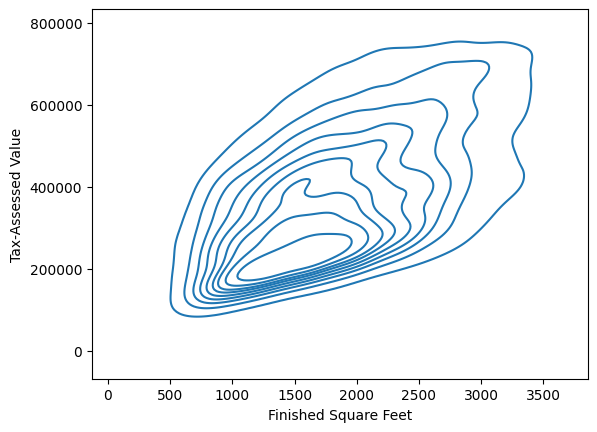

In [5]:
# 等高線
kc_tax0 = kc_tax0.sample(20000, random_state=42)
ax = sns.kdeplot(x=kc_tax0.SqFtTotLiving, y=kc_tax0.TaxAssessedValue)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value');

## 兩個類別變數

In [12]:
# 載入資料集
lc_loans = pd.read_csv('../../data/lc_loans.csv')

# 樞紐分析表
# Step 1: 原始交叉表
count_df = lc_loans.pivot_table(index='grade', columns='status', aggfunc='size')

# Step 2: 計算百分比（row-wise）
percentage_df = count_df.div(count_df.sum(axis=1), axis=0).round(3) * 100

# Step 3: 加上 MultiIndex 欄名
count_df.columns = pd.MultiIndex.from_product([count_df.columns, ['count']])
percentage_df.columns = pd.MultiIndex.from_product([percentage_df.columns, ['%']])

# Step 4: 合併
combined_df = pd.concat([count_df, percentage_df], axis=1)

print(combined_df)

status Charged Off Current Fully Paid  Late Charged Off Current Fully Paid  \
             count   count      count count           %       %          %   
grade                                                                        
A             1562   50051      20408   469         2.2    69.0       28.2   
B             5302   93852      31160  2056         4.0    70.9       23.5   
C             6023   88928      23147  2777         5.0    73.6       19.1   
D             5007   53281      13681  2308         6.7    71.7       18.4   
E             2842   24639       5949  1374         8.2    70.8       17.1   
F             1526    8444       2328   606        11.8    65.4       18.0   
G              409    1990        643   199        12.6    61.4       19.8   

status Late  
          %  
grade        
A       0.6  
B       1.6  
C       2.3  
D       3.1  
E       3.9  
F       4.7  
G       6.1  


## 類別變數與數值變數

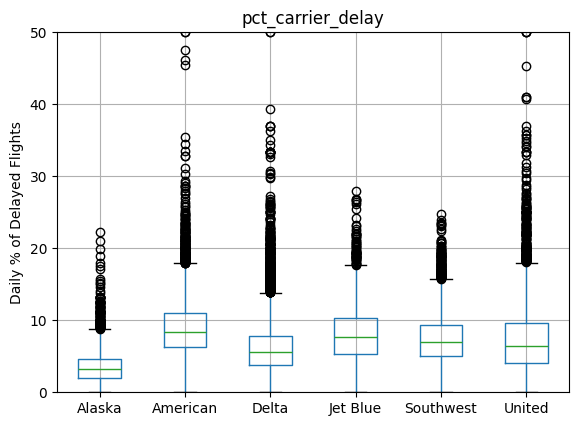

In [15]:
# 載入資料集
airline_stats = pd.read_csv('../../data/airline_stats.csv')

# 箱形圖
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
ax.set_ylim(0,50)
plt.suptitle('');

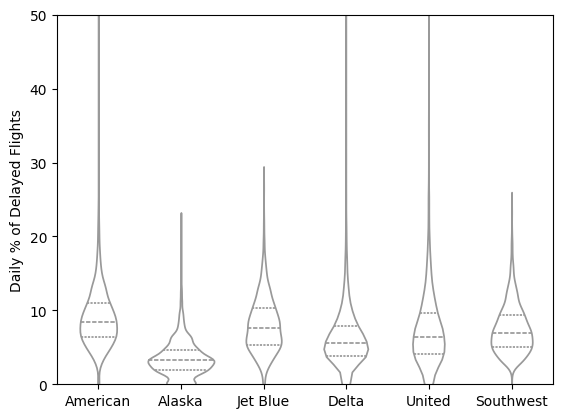

In [18]:
# 小提琴圖
ax = sns.violinplot(x=airline_stats.airline, y=airline_stats.pct_carrier_delay,
                    inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylim(0, 50)
ax.set_ylabel('Daily % of Delayed Flights');

## 多個變數的視覺圖

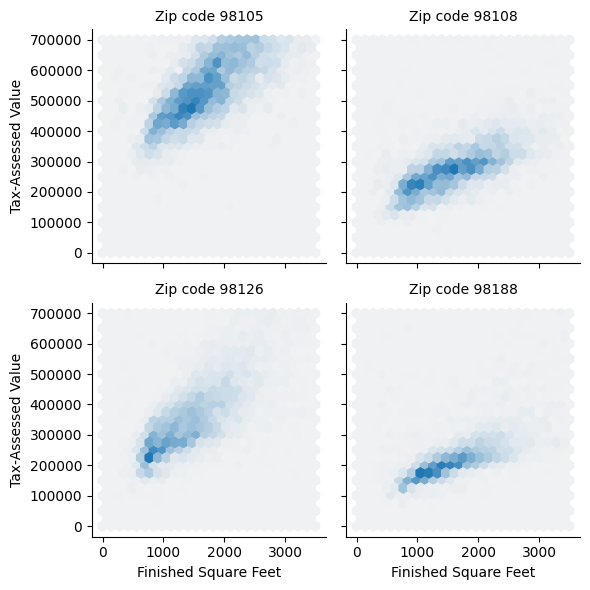

In [26]:
# 加上郵遞區號多子圖比較
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0[kc_tax0.ZipCode.isin(zip_codes)]

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}');